<a href="https://colab.research.google.com/github/shintafiaa/Teaching-Assistant-Technobar/blob/main/4_Decision_Tree_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
import pydotplus
from sklearn.metrics import accuracy_score

In [ ]:
# Membaca dataset sebagai DataFrame
df = pd.read_csv('/content/drive/MyDrive/Dataset/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Memisahkan fitur-fitur dan target
X = df.drop('Outcome', axis=1)  # Menghapus kolom 'Outcome' dari DataFrame sebagai fitur-fitur
y = df['Outcome']  # Menggunakan kolom 'Outcome' sebagai target

In [ ]:
# Memisahkan dataset menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
# Inisialisasi objek DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Melatih model menggunakan data train
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
!pip install graphviz==0.16
!pip install pydotplus==2.0.2

  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


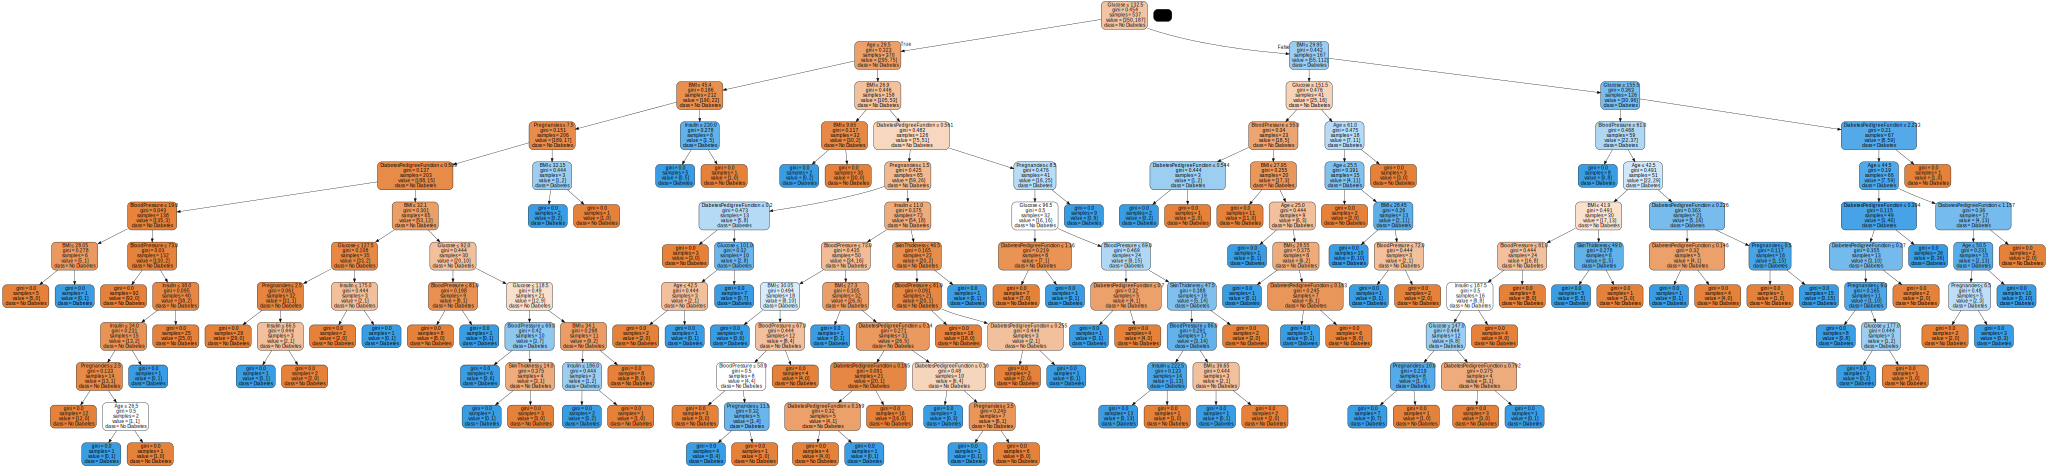

In [ ]:
# Generate dot data for the decision tree
dot_data = tree.export_graphviz(dt_classifier, out_file=None, feature_names=X_train.columns, class_names=['No Diabetes', 'Diabetes'], filled=True, rounded=True, special_characters=True)

# Write dot data to a file
with open("tree.dot", "w") as file:
    file.write(dot_data)

# Read dot data from the file
with open("tree.dot", "r") as file:
    dot_data = file.read()

# Create graph from dot data
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the decision tree graph
graphviz.Source(graph.to_string())

In [ ]:
# Menggunakan model untuk melakukan prediksi pada data test
y_pred = dt_classifier.predict(X_test)

# Menghitung Classification Accuracy (CA)
ca = accuracy_score(y_test, y_pred)
print("Classification Accuracy (CA):", ca)

Classification Accuracy (CA): 0.7619047619047619
